In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json

In [2]:
from sklearn.decomposition import TruncatedSVD

In [3]:
l1=pd.read_csv("FinalDataset/URL/Benign_list_big_final.csv", header=None)
l1['result'] = [0 for _ in range(l1.shape[0])]
l1['type'] = 'Benign'
l1

,0,result,type
0,http://1337x.to/torrent/1048648/American-Snipe...,0,Benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,Benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,Benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,Benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,Benign
...,...,...,...
35373,https://lastpass.com/signup2.php?ac=1&from_uri...,0,Benign
35374,https://lastpass.com/signup2.php?ac=1&from_uri...,0,Benign
35375,https://lastpass.com/signup2.php?ac=1&from_uri...,0,Benign
35376,https://lastpass.com/signup2.php?ac=1&from_uri...,0,Benign


In [4]:
l2=pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [1 for _ in range(l2.shape[0])]
l2['type'] = 'Defacement'
l2

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
96452,http://www.laurenzano.com.ar/index.php?option=...,1,Defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96454,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96455,http://www.laurenzano.com.ar/x.txt,1,Defacement


In [5]:
l3=pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [2 for _ in range(l3.shape[0])]
l3['type'] = 'Malware'
l3

,0,result,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
3,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,2,Malware
...,...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,2,Malware
11562,http://www.plastischechirurgie.net/haartranspl...,2,Malware
11563,http://www.plastischechirurgie.net/korper/gyna...,2,Malware
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,2,Malware


In [6]:
l4=pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [3 for _ in range(l4.shape[0])]
l4['type'] = 'Phishing'
l4

,0,result,type
0,http://v2.email-marketing.adminsimple.com/trac...,3,Phishing
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,3,Phishing
2,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
3,http://www.google.com.ng/imgres?imgurl=http://...,3,Phishing
4,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
...,...,...,...
9960,http://highedgesolar.com/nw/includes/,3,Phishing
9961,http://jimfangimporters.yolasite.com/,3,Phishing
9962,http://liuheng.chengxuren.com/Images/,3,Phishing
9963,http://mcnaotempreco.net/site/portal/,3,Phishing


In [7]:
l5=pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [4 for _ in range(l5.shape[0])]
l5['type'] = 'Spam'
l5

,0,result,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,4,Spam
2,http://appbasic.jettons.co.uk/links/index.html,4,Spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,4,Spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,4,Spam
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


In [8]:
data=[l1,l2,l3,l4,l5]
urls = pd.concat(data)
urls = urls.rename({0: 'url'}, axis=1)
urls
urls

,url,result,type
0,http://1337x.to/torrent/1048648/American-Snipe...,0,Benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,Benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,Benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,Benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,Benign
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


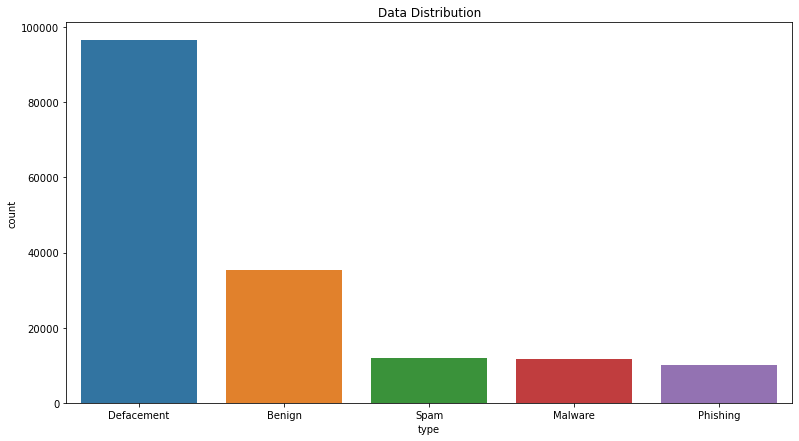

In [21]:
fig = plt.gcf()
fig.set_size_inches(13,7)
sns.countplot(x = 'type', data = urls, order = urls['type'].value_counts().index).set_title("Data Distribution")
plt.show()

In [19]:
X_train, X_rem, y_train, y_rem = train_test_split(urls['url'],urls['result'], train_size=0.8,stratify=urls['result'])

In [20]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [21]:
print(X_train.shape,X_valid.shape,X_test.shape)

(132292,) (16537,) (16537,)


In [22]:
t1 = {'url': X_train, 'result': y_train}
train_set = pd.DataFrame(data=t1)
train_set

,url,result
8718,http://player.polyv.net/videos/3ee850a192d81e2...,2
14542,http://www.hmaca.com/winnipeg-accounting-blog,1
329,http://www.generalcustom.com.br/index.php?opti...,1
10967,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
8893,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
78735,http://masterstrans.com/component/contact/1,1
48033,http://www.tvmiros.gr/parousiasi-tou-sxediou-m...,1
34795,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
8201,http://schertzauto.com/wp-content/themes/NAPA%...,2


In [23]:
t2 = {'url': X_valid, 'result': y_valid}
valid_set = pd.DataFrame(data=t2)
valid_set

,url,result
93978,http://jmrsl.net/index.php?option=com_jevents&...,1
59340,http://www.ekwdesign.de/referenzen/corporate-d...,1
6669,http://img25.artxun.com/sdd/oldimg/5dfd/5dfd94...,2
28098,http://yourdayyourbudget.com/index.php?option=...,1
5105,http://www.modconsolas.com/portal/index.php?li...,1
...,...,...
6513,http://bisaneema.org/%e0%a4%87%e0%a4%a4%e0%a4%...,2
57046,http://drogheriapreti.com/chi-siamo.html,1
6679,http://otomoto.pl/oferta/renault-trafic-zareje...,0
54587,http://www.bishopstrings.com/violins/ยฃ5000-ยฃ...,1


In [24]:
t3 = {'url': X_test, 'result': y_test}
test_set = pd.DataFrame(data=t3)
test_set

,url,result
2130,http://www.jin0044.com/cl/?module=System&metho...,2
6202,http://bjgdhm.com/show_products.asp?id=433,1
38693,http://www.masseny.de/index.php?option=com_pho...,1
27965,http://maybank2u.com.my/mbb_info/m2u/public/pe...,0
11682,http://yourlust.com/videos/picked-up-whore-kar...,0
...,...,...
71815,http://www.lisambiental.com.br/x.txt,1
8196,http://pflegeheim-lausitz.de/index.php?option=...,1
52522,http://www.shekinahphotography.co.za/index.php...,1
46349,http://wddga.com/index.html?limitstart=20&font...,1


Text(0.5, 1.0, 'Train Set')

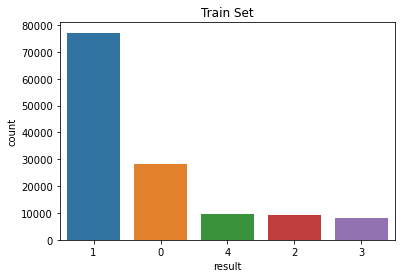

In [35]:
sns.countplot(x = 'result', data = train_set, order = train_set['result'].value_counts().index).set_title("Train Set")

Text(0.5, 1.0, 'Valid Set')

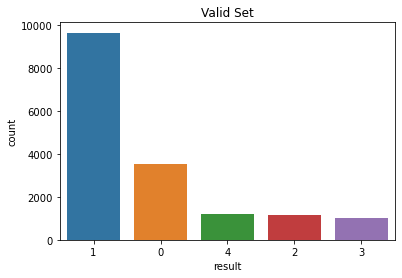

In [36]:
sns.countplot(x = 'result', data = valid_set, order = valid_set['result'].value_counts().index).set_title("Valid Set")

Text(0.5, 1.0, 'Test Set')

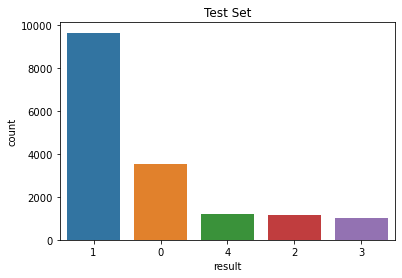

In [37]:
sns.countplot(x = 'result', data = test_set, order = test_set['result'].value_counts().index).set_title("Test Set")

In [25]:
train_set.to_csv('train_set.csv', index=False)

In [26]:
valid_set.to_csv('valid_set.csv', index=False)

In [27]:
test_set.to_csv('test_set.csv', index=False)